# Adapted from Harsh Jain colab notebook with edits by me

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
train = pd.read_csv('~/Documents/datasets/drugsComTrain_raw.csv')
test = pd.read_csv('~/Documents/datasets//drugsComTest_raw.csv')
# df.head()

In [68]:
train.shape

(161297, 7)

In [69]:
data = pd.concat([train, test])
data.head()
data.shape

(215063, 7)

In [70]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [71]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [72]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

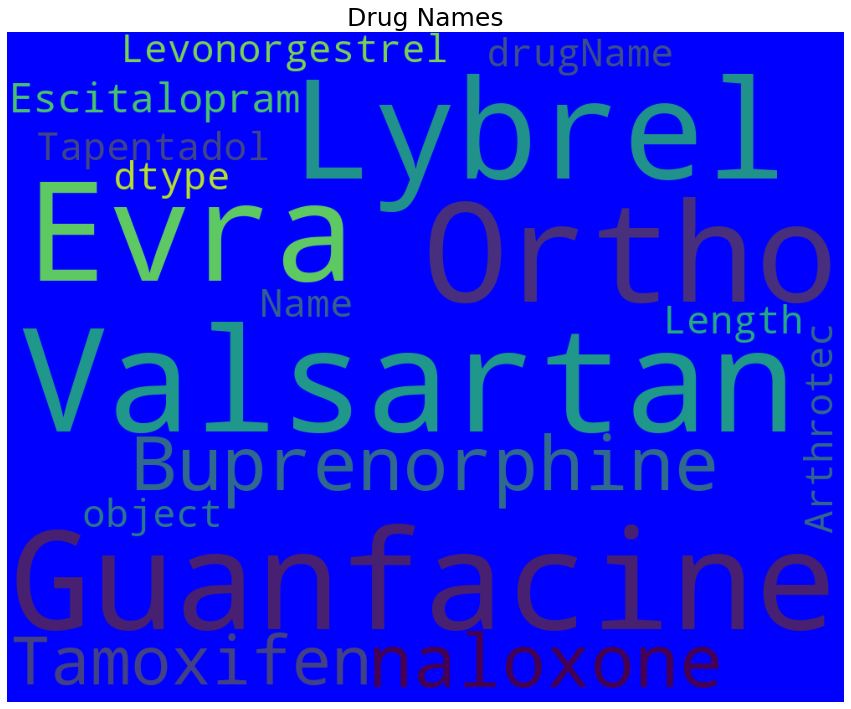

In [11]:
stopwords = STOPWORDS
wordcloud = WordCloud(background_color = 'blue', stopwords = stopwords, width = 1000, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('drugnames.png')
plt.show()

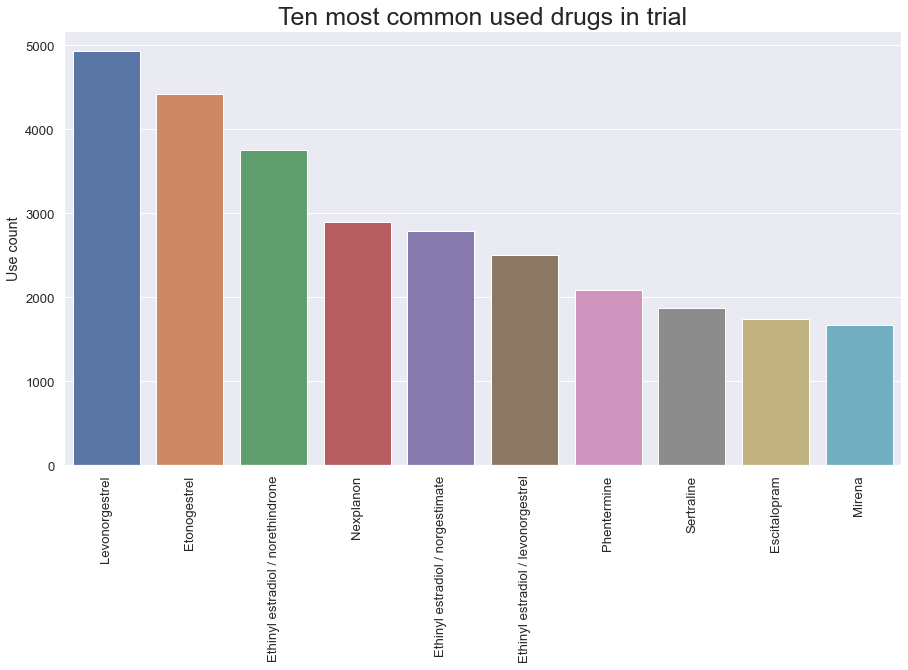

In [92]:
# df1 = data['drugName'].value_counts()
# sns.set(font_scale = 1.2, style = 'darkgrid')

# sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'mako')
# # sns_.set_xlabel('Drug Names')
# sns_.set_title("Top 10 Drugs", fontsize = 25)
# plt.setp(sns_.get_xticklabels(), rotation = 90)
# # plt.savefig('top_drugs_for_birth_control.png');df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
# sns.set(font_scale = 1.2, style = 'darkgrid')

# sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'mako')
# # sns_.set_xlabel('Drug Names')
# sns_.set_title("Top 10 Drugs used for Birth Control", fontsize = 25)
# plt.setp(sns_.get_xticklabels(), rotation = 90)
# plt.savefig('top_drugs_for_birth_control.png');
# sns.countplot(data = data, x = 'drugName', order = data.drugName.value_counts().iloc[:10].sort_values())
# data.info()
fontdict = {'fontsize':25}
ax = sns.countplot(x='drugName',data=data,order=pd.value_counts(data['drugName']).iloc[:10].index)
ax.set_title('Ten most common used drugs in trial', fontdict = fontdict)
ax.set_ylabel("Use count")
ax.set_xlabel("")
# ax.set_xticklabels(rotation=90)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.savefig('Ten_most_common_drugs.png');

In [95]:
data.nunique()

uniqueID       215063
drugName         3671
condition         916
review         128478
rating             10
date             3579
usefulCount       397
dtype: int64

In [96]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 18.1+ MB


In [99]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [100]:
data.date.min()

Timestamp('2008-02-24 00:00:00')

In [101]:
data.date.max()

Timestamp('2017-12-12 00:00:00')

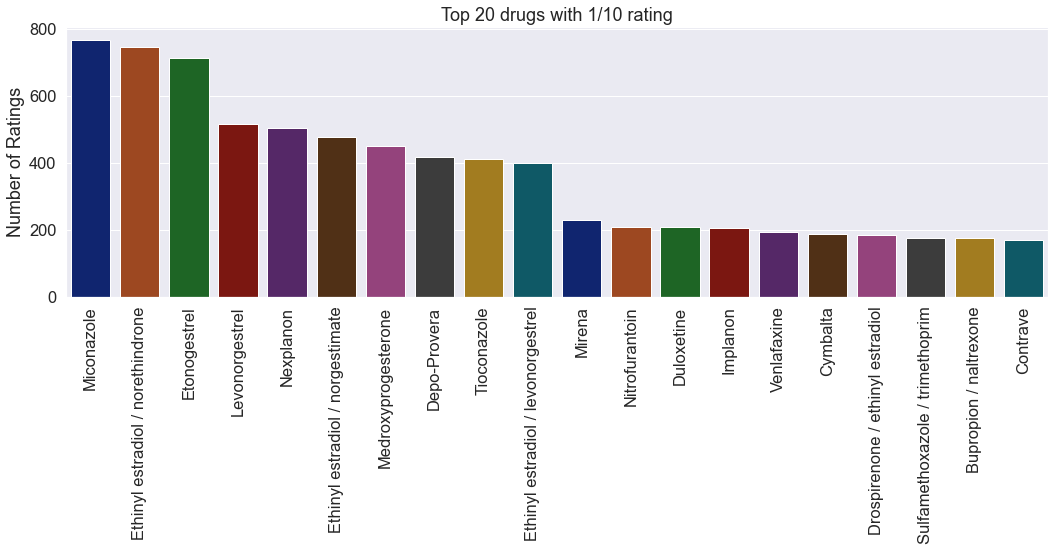

In [167]:
sns.set(font_scale = 1.5, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'dark')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
# sns_rating.set_xlabel("Drug Names")
plt.savefig('drugs_rated_1.png')
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('drugs_rated_1.png');

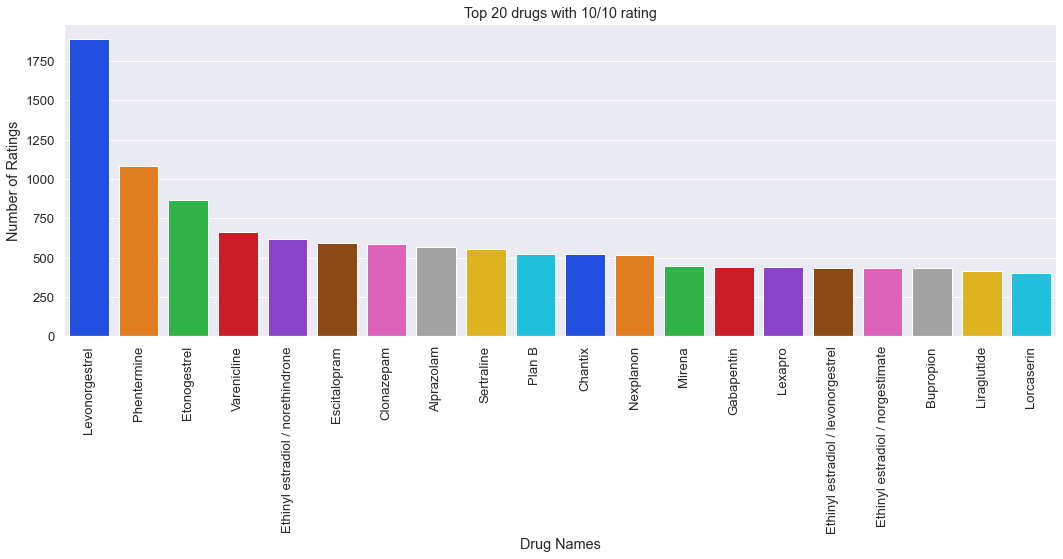

In [168]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'bright')

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('drugs_rated_10.png');

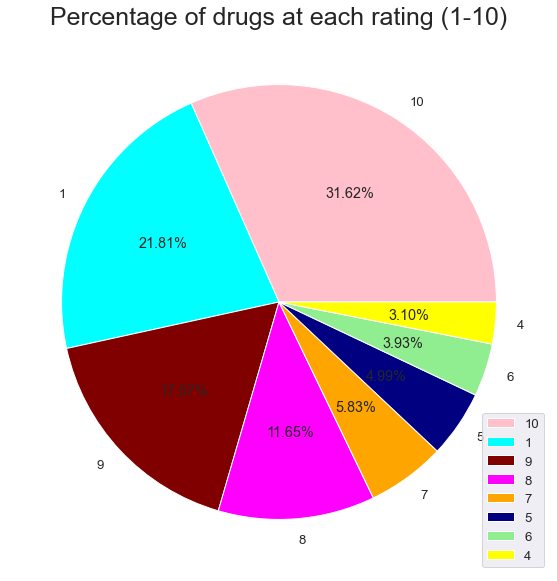

In [14]:
size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

# my_circle = plt.pie((0, 0), 0.7)

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Percentage of drugs at each rating (1-10)', fontsize = 25)
p = plt.gcf()
# plt.gca().add_artist(my_circle)
plt.legend()
plt.savefig('pie_chart_drug_rating_distribution.png')
plt.show()

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/cp/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


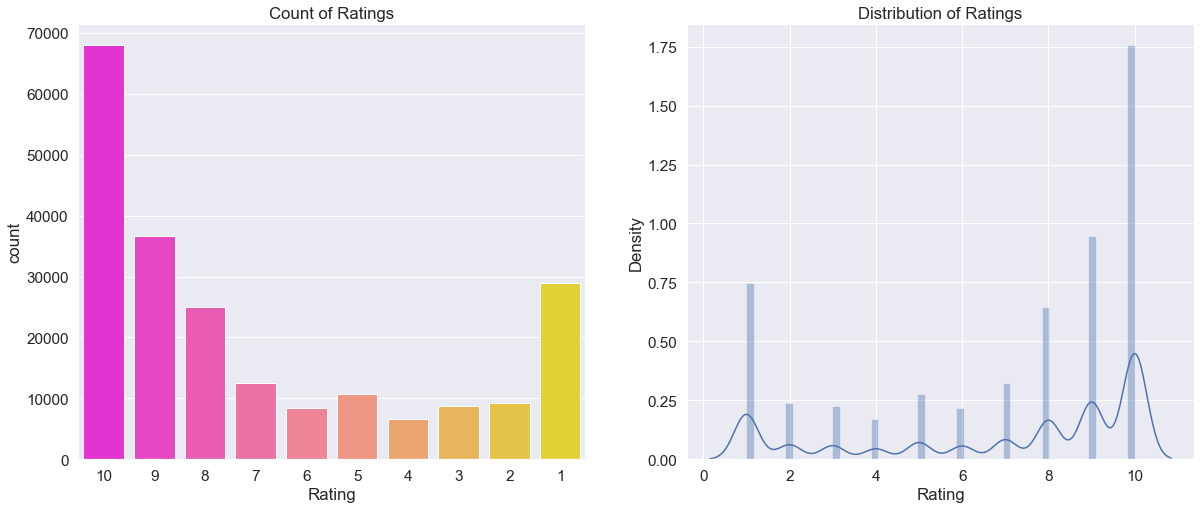

In [15]:
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")
plt.savefig('count_of_ratings_w_dist_ratings.png')

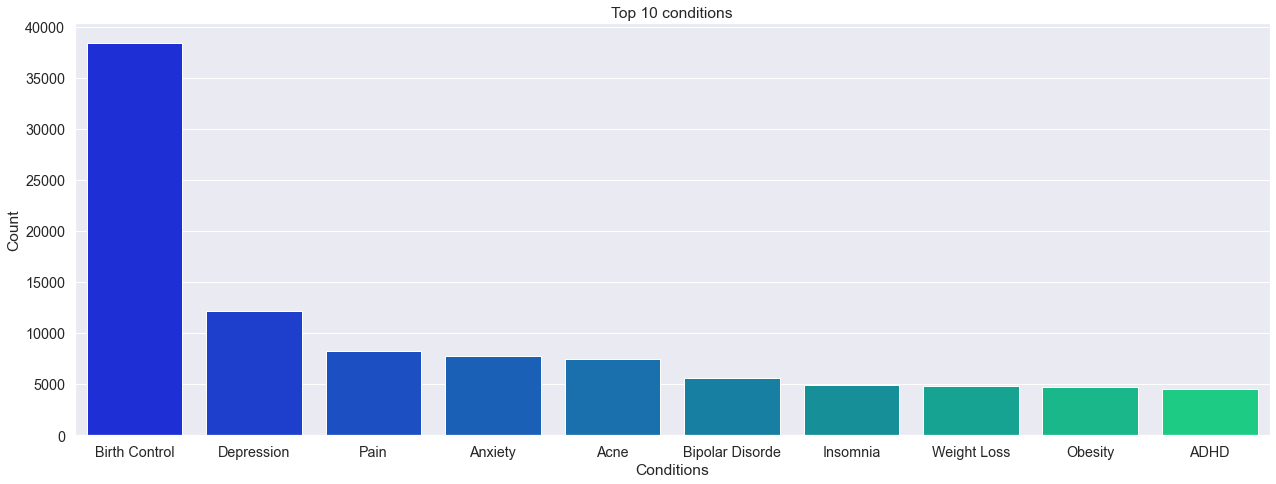

In [169]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count")
plt.tight_layout()
plt.savefig('top10_conditions_for_drugs.png');


# Birth control is the most common reason for drug use

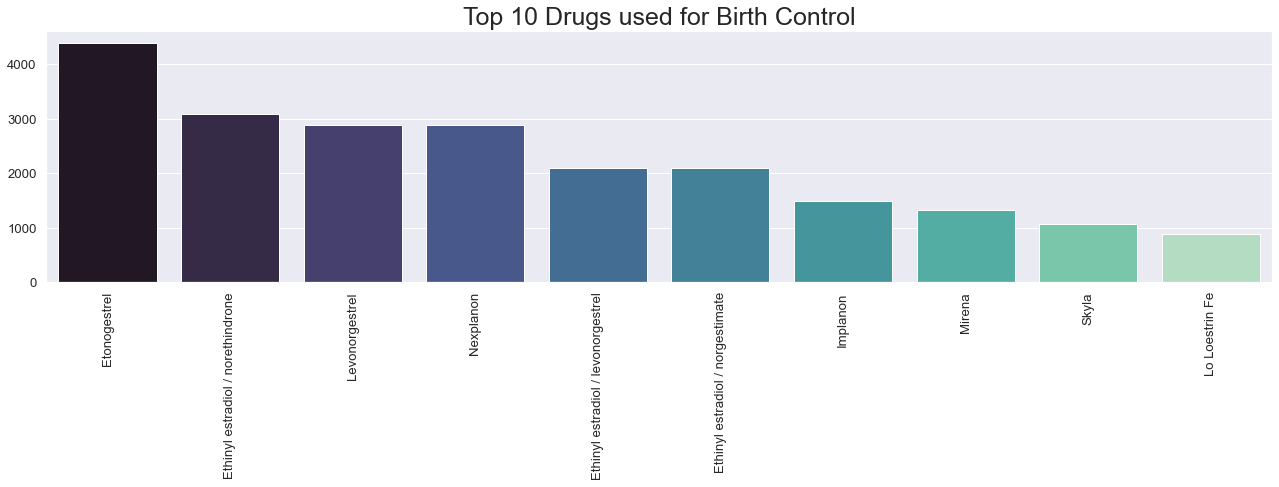

In [170]:
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'mako')
# sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control", fontsize = 25)
plt.setp(sns_.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.savefig('top_drugs_for_birth_control.png');

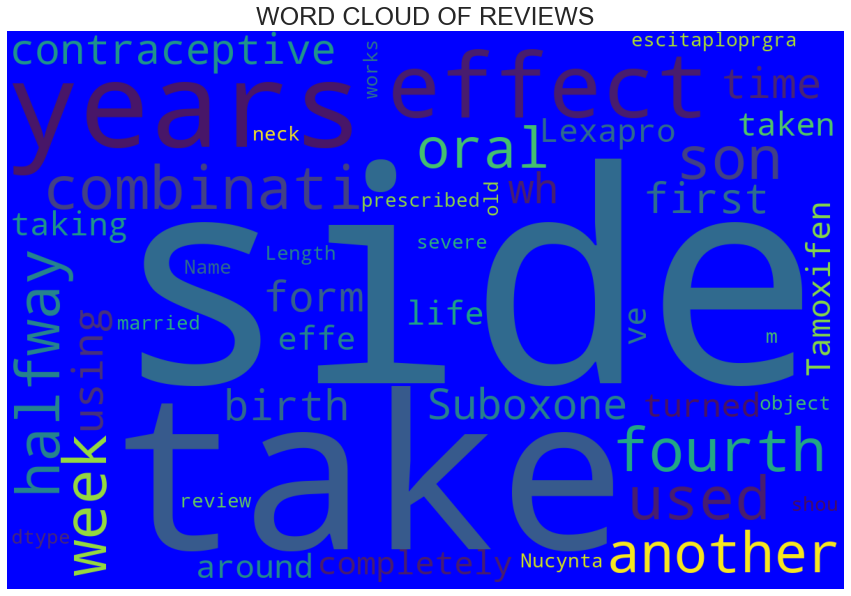

In [18]:
wordcloud = WordCloud(background_color = 'blue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('word_cloud_reviews_1.png')
plt.show()

In [19]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['rating'] >= 7), 'Review_Sentiment'] = 2
data.loc[(data['rating'] >= 4) & (data['rating'] < 7), 'Review_Sentiment'] = 1

data.loc[(data['rating'] < 4), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

2.0    142306
0.0     46901
1.0     25856
Name: Review_Sentiment, dtype: int64

In [20]:
import math
import numpy as np

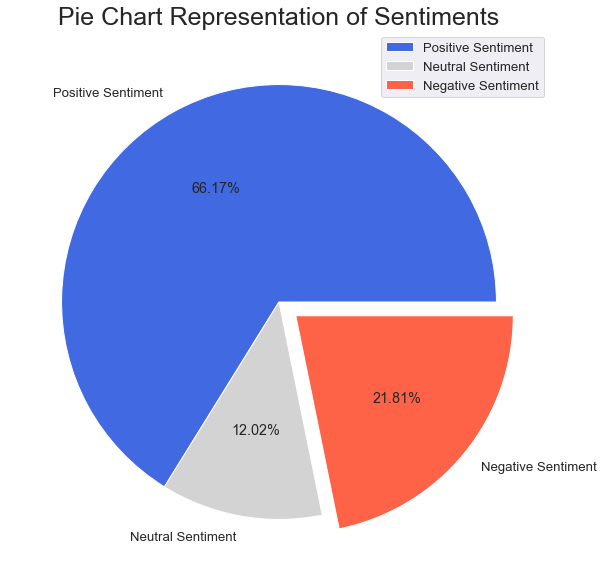

In [21]:
size = [142306, 25856, 46901]
colors = ['royalblue','lightgray' ,'tomato']
labels = "Positive Sentiment",'Neutral Sentiment', "Negative Sentiment"
explode = [0, 0,0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.savefig('pos_neutral_neg_sentiment.png')
plt.show()


In [105]:
# data.usefulCount.groupby(['drugName'])
data2 = data[['drugName', 'usefulCount']]

In [111]:
tes1 = data2.groupby(by= ['drugName']).sum()
# df.groupby(by=["b"], dropna=False).sum()

In [116]:
tes1

,usefulCount
drugName,
A + D Cracked Skin Relief,6
A / B Otic,38
Abacavir / dolutegravir / lamivudine,901
Abacavir / lamivudine,11
Abacavir / lamivudine / zidovudine,1
...,...
ZzzQuil,21
depo-subQ provera 104,1
ella,677


In [118]:
# tes1.value_counts().sort_values()
fontdict = {'fontsize':25}
ax1 = sns.barplot(x='drugName',y = 'usefulCount')

# ax.set_xticklabels(rotation=90)
plt.setp(ax.get_xticklabels(), rotation=90)

ValueError: Could not interpret input 'drugName'

In [135]:
tes1['usefulCount'].value_counts()

0       163
2        91
1        84
3        82
5        61
       ... 
2488      1
431       1
6574      1
427       1
550       1
Name: usefulCount, Length: 1317, dtype: int64

In [148]:
test2 = tes1.reset_index()

In [137]:
tes1.usefulCount.max()

82729

In [149]:
test2

,drugName,usefulCount
0,A + D Cracked Skin Relief,6
1,A / B Otic,38
2,Abacavir / dolutegravir / lamivudine,901
3,Abacavir / lamivudine,11
4,Abacavir / lamivudine / zidovudine,1
...,...,...
3666,ZzzQuil,21
3667,depo-subQ provera 104,1
3668,ella,677
3669,femhrt,81


In [152]:
df8= tes1.usefulCount.sort_values(ascending = False)[:10]

In [156]:
df9 =df8.reset_index()


In [157]:
df9.head()

,drugName,usefulCount
0,Sertraline,82729
1,Gabapentin,76873
2,Escitalopram,68802
3,Bupropion,66545
4,Zoloft,63109


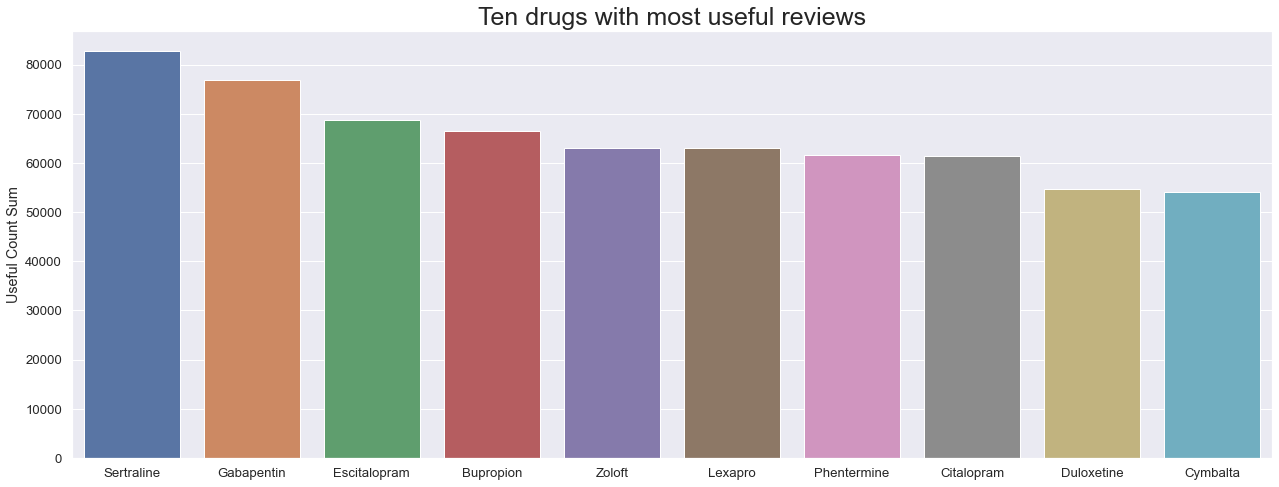

In [171]:
ax3 = sns.barplot(x='drugName', y='usefulCount', data=df9)
ax3.set_title('Ten drugs with most useful reviews', fontdict = fontdict)
ax3.set_ylabel("Useful Count Sum")
ax3.set_xlabel("")
plt.tight_layout()
plt.savefig('most_useful_counts.png')

In [128]:
# ax2 = sns.barplot(x=tes1['drugName'].value_counts()[:10], y=tes1[]"usefulCount"].value_counts()[:10], data=tes1.reset_index())

In [123]:
tes1.index

Index(['A + D Cracked Skin Relief', 'A / B Otic',
       'Abacavir / dolutegravir / lamivudine', 'Abacavir / lamivudine',
       'Abacavir / lamivudine / zidovudine', 'Abatacept', 'Abilify',
       'Abilify Discmelt', 'Abilify Maintena', 'Abiraterone',
       ...
       'Zyrtec', 'Zyrtec-D', 'Zyrtec-D 12 Hour', 'Zytiga', 'Zyvox', 'ZzzQuil',
       'depo-subQ provera 104', 'ella', 'femhrt', 'pHisoHex'],
      dtype='object', name='drugName', length=3671)

In [22]:
positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 2]])


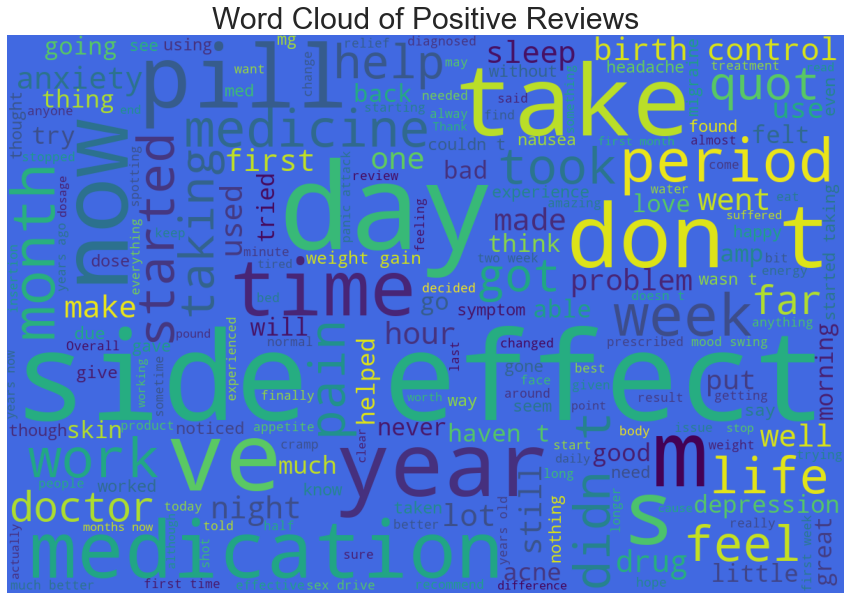

In [23]:
wordcloud = WordCloud(background_color = 'royalblue', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('word_cloud_postive.png')
plt.show()

In [24]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment'],
      dtype='object')

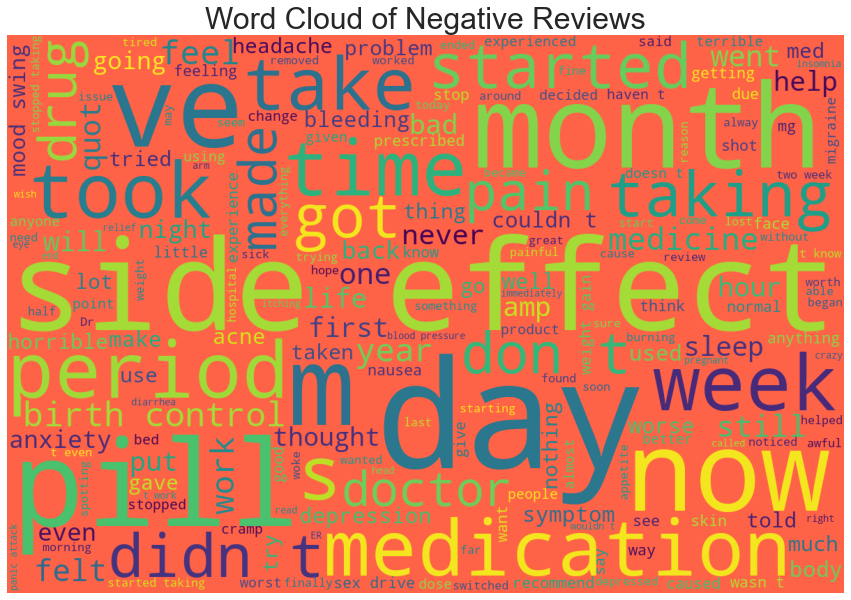

In [25]:
negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'tomato', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig('word_cloud_negative.png')
plt.show()

In [26]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


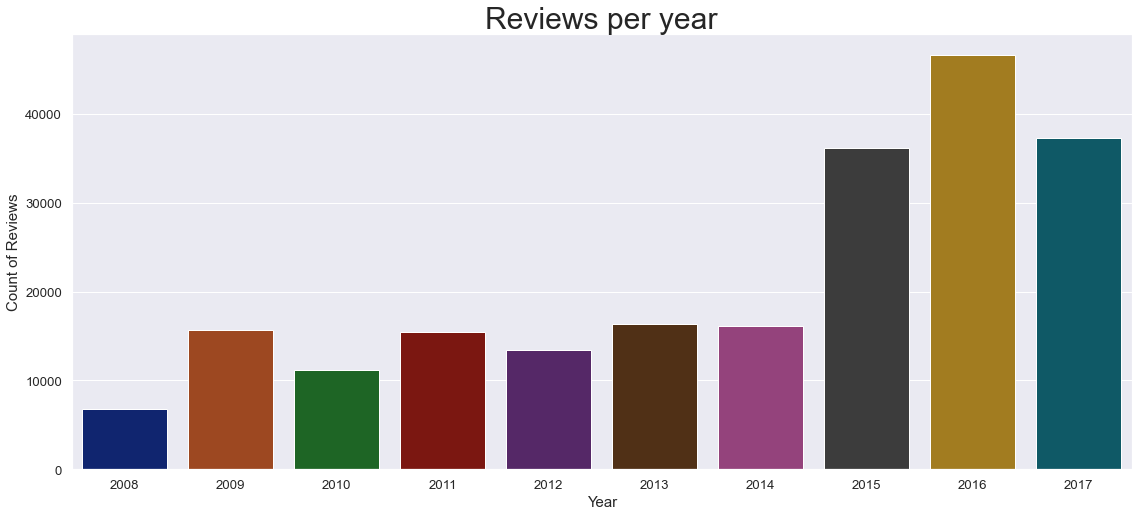

In [28]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['Year'], palette ='dark')
plt.title('Reviews per year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.savefig('reviews_per_year.png')
plt.show()

In [29]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2.0,2012,5,20
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2.0,2010,4,27
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2.0,2015,11,3
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2.0,2016,11,27


/Users/cp/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


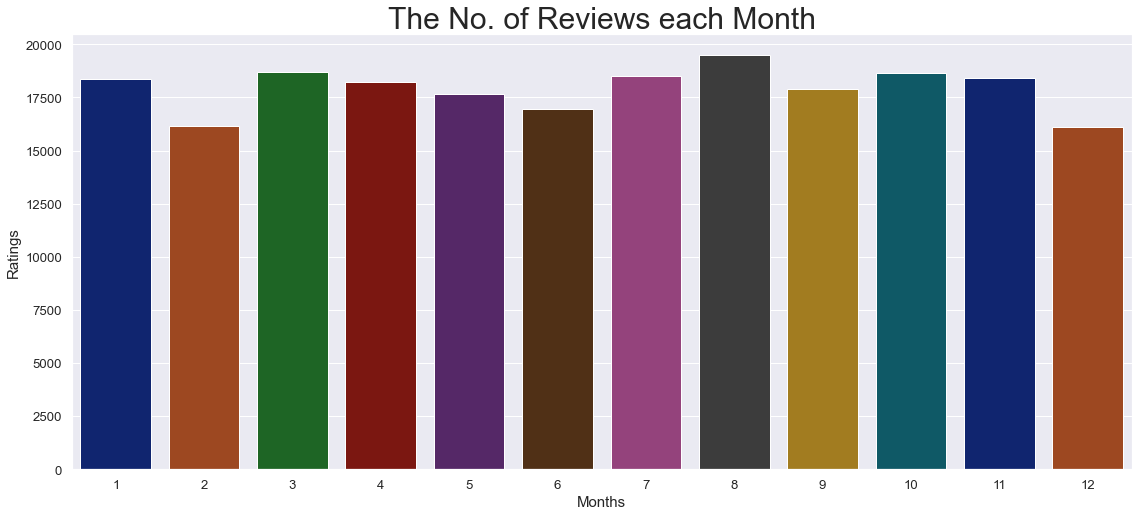

In [31]:
# looking at the no. of reviews in each of the months

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['month'], palette ='dark')
plt.title('The No. of Reviews each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.savefig('reviews_by_month.png')
plt.show()

In [32]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2.0,2012,5,20
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2.0,2010,4,27
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2.0,2015,11,3
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2.0,2016,11,27


# Useful count is number of people who found the review "useful"

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


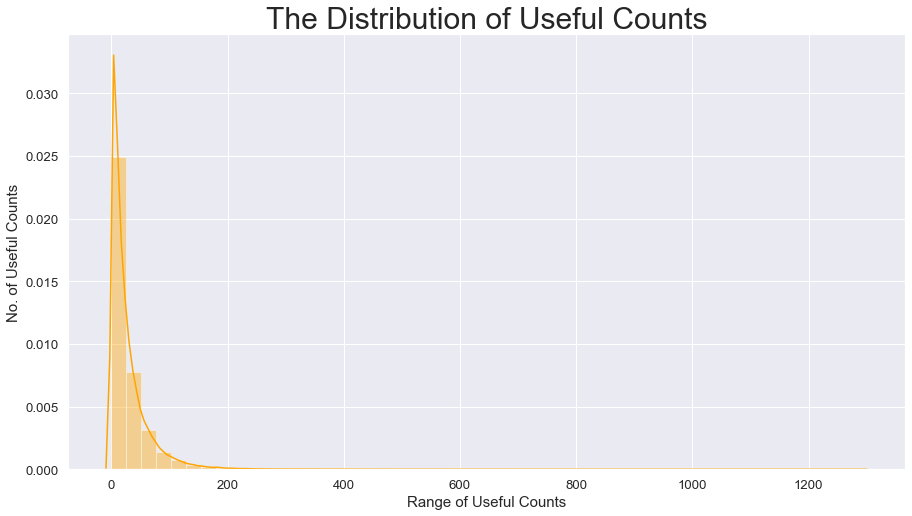

In [34]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['usefulCount'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.savefig('useful_count_png.png')
plt.show()

# Data preparation feature engineering

In [35]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe


In [36]:
data['review_clean'] = review_clean(data['review'])

In [37]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [38]:
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [39]:
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2.0,2012,5,20,side effect take combin bystol 5 mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2.0,2010,4,27,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,use take anoth oral contracept 21 pill cycl ha...


In [40]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [41]:
data['sentiment'] = sentiment(data['review'])

In [42]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [43]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_ss'] = review_clean(data['review'])
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [44]:
data = data.dropna(how="any", axis=0)

In [45]:
#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [46]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'Year', 'month', 'day',
       'review_clean', 'sentiment', 'sentiment_clean', 'review_clean_ss',
       'sentiment_clean_ss', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len'],
      dtype='object')

In [47]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,...,review_clean_ss,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2.0,2012,5,...,it has no side effect i take it in combination...,0.000000,17,16,76,3,1,6,7,3.529412
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2.0,2010,4,...,my son is halfway through his fourth week of i...,0.168333,141,97,716,23,2,13,69,4.085106
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,...,i used to take another oral contraceptive whic...,0.067210,134,89,714,34,6,15,59,4.335821
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,2.0,2015,11,...,this is my first time using any form of birth ...,0.179545,91,58,432,15,4,9,45,3.758242
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2.0,2016,11,...,suboxone has completely turned my life around ...,0.194444,125,85,670,28,7,15,60,4.368000


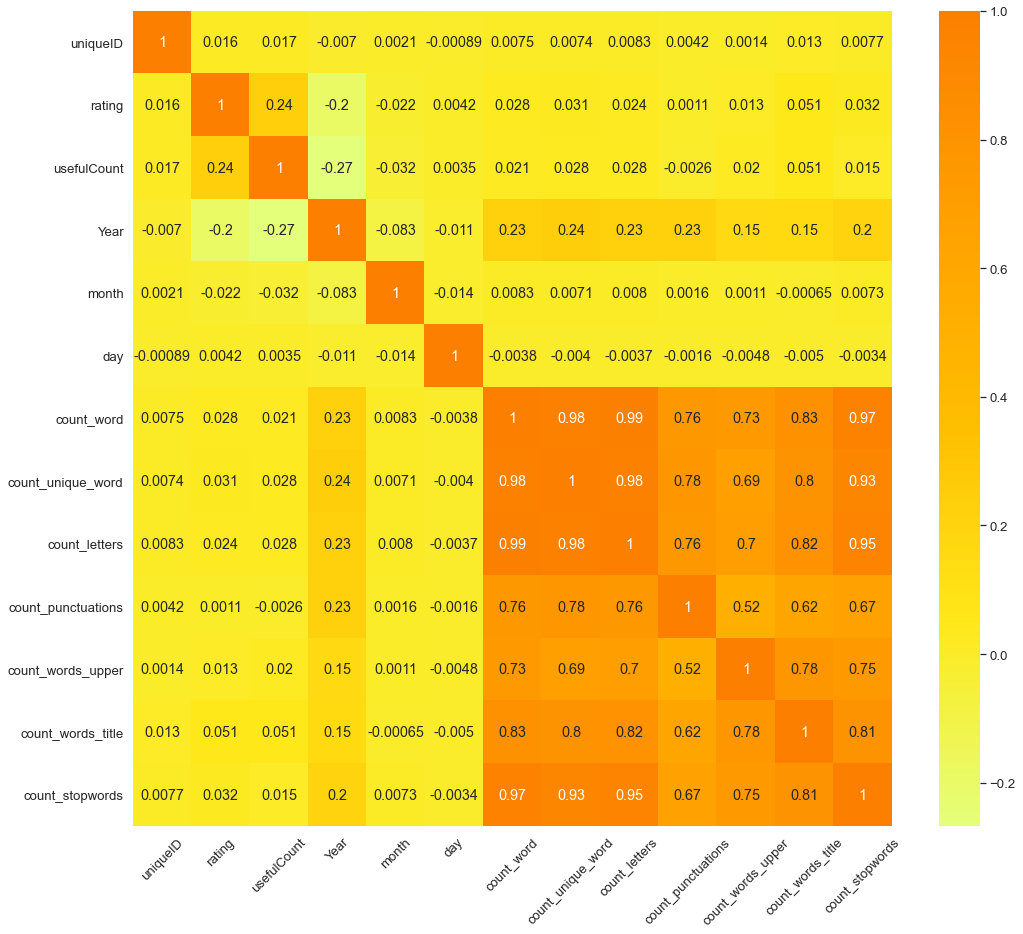

In [48]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);


# Label Encoding

In [49]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

In [ ]:
|